# Weekly project
This weeks weekly project is a continuation of last weeks exercises.

You are to make a handwritten number classifier. Where we will be using the [mnist dataset](https://en.wikipedia.org/wiki/MNIST_database).

![image.png](attachment:image.png)

**Create a program that given an image from the mnist dataset.**
- You are free to use any algorithm you want to achieve this.
- It should be able to given a number classify what number it is.
- Accuracy should at least be 80%

If you decide to use a svm make sure you also use dimensionality reduction. SVM of the full mnist dataset will take around 4-8 hours depending on your pc.

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
from sklearn.decomposition import PCA
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_openml

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mnist = fetch_openml('mnist_784', version=1)

# images have a shape of (70000,784), meaning there are 70000 images,
# with 784 dimensions (features)
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy() # labels: numbers 0-9

print(images.shape)
print(targets.shape)

(70000, 784)
(70000,)


In [31]:
print(type(mnist.data))

<class 'pandas.core.frame.DataFrame'>


In [15]:
# PCA is affected by scale so you need to scale the features in the data before applying PCA
from sklearn.preprocessing import StandardScaler
images_scaled = StandardScaler().fit_transform(images)

# split data 
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(images_scaled, targets, test_size = 0.2)

pca = PCA(0.8)  # It means that scikit-learn choose the minimum number of principal components 
                # such that 95% of the variance is retained.
principalComponents = pca.fit_transform(images_scaled)

# print(pca.explained_variance_ratio_)

# print(sum(pca.explained_variance_ratio_))

In [19]:
# Apply Logistic Regression to the Transformed Data
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
logisticRegr.fit(train_img, train_lbl)

0.9161428571428571

['6' '7' '8' '3' '8' '5' '3' '9' '5' '4']


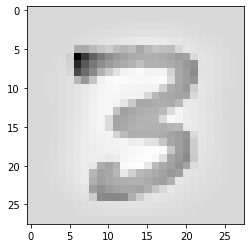

In [28]:
# Predict for One Observation (image)
# logisticRegr.predict(test_img[0].reshape(1,-1))
# logisticRegr.score(test_img, test_lbl)

# Predict for One Observation (image)
print(logisticRegr.predict(test_img[0:10]))
plt.imshow(test_img[3].reshape(28,28),cmap=plt.cm.gray_r, interpolation='nearest')

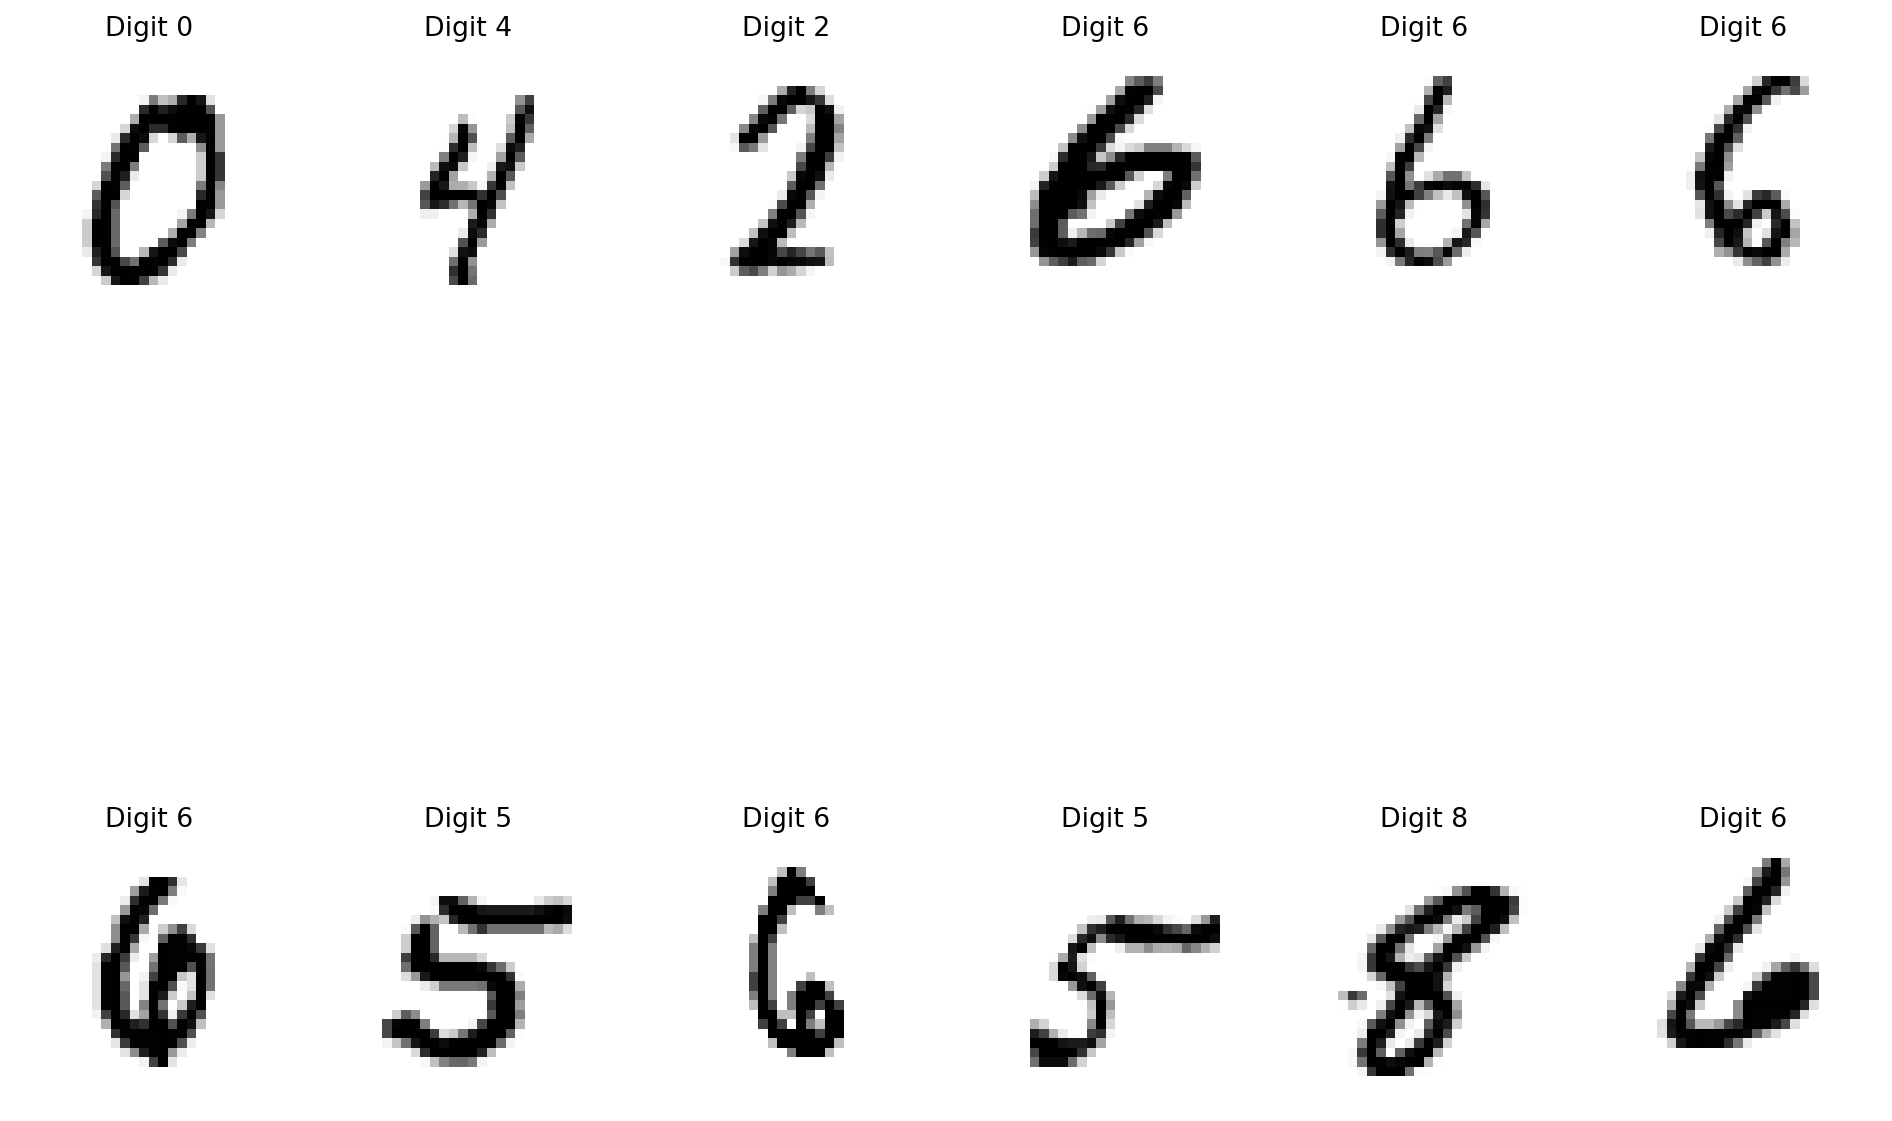

In [5]:
def show_some_digits(images, targets, sample_size=24, title_text='Digit {}' ):
    '''
    Visualize random digits in a grid plot
    images - array of flatten gidigs [:,784]
    targets - final labels
    '''
    nsamples=sample_size
    rand_idx = np.random.choice(images.shape[0], nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))


    img = plt.figure(1, figsize=(15, 12), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(np.ceil(nsamples/6.0), 6, index + 1)
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))
    plt.show()



# draw 12 images along with their labels
show_some_digits(images, targets, 12)

**Challange:**
- Try to reach 98% accuracy.
- Try to classify faces with the labeled wild faces dataset [lwf](http://vis-www.cs.umass.edu/lfw/)
```{Python}
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
```

In [34]:
# IMPORT the dataset
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [47]:
# PCA is affected by scale so you need to scale the features in the data before applying PCA
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# split data 
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size = 0.25, random_state = 42)

pca = PCA(n_components=150, svd_solver='randomized', whiten=True)

X_train_pca = pca.fit_transform(train_img)
X_test_pca = pca.fit_transform(test_img)

print(pca.explained_variance_ratio_)
print(len(pca.explained_variance_ratio_))
print(sum(pca.explained_variance_ratio_))

[0.22291596 0.16031054 0.07881592 0.05562308 0.03576576 0.0312821
 0.02486016 0.01953438 0.01826898 0.01584278 0.01492987 0.01319865
 0.01291975 0.01103012 0.01023683 0.01000445 0.00924603 0.00834787
 0.00776127 0.00698286 0.00669741 0.00652586 0.00637351 0.00578648
 0.00562342 0.00529084 0.00527282 0.00473169 0.00466017 0.00442591
 0.00432596 0.00407048 0.00399231 0.00366495 0.00347611 0.0033727
 0.00332412 0.00316119 0.00313215 0.00301719 0.00298746 0.00287368
 0.0027661  0.0026921  0.00256469 0.00251055 0.00245171 0.00234494
 0.00233824 0.00217984 0.00210173 0.00207189 0.00201928 0.00198539
 0.00196333 0.00193896 0.00185923 0.00181353 0.00180117 0.00178507
 0.00176987 0.00172166 0.0016925  0.00161337 0.0015629  0.00153679
 0.00149813 0.00145395 0.00143268 0.00141377 0.00137578 0.00135861
 0.00130994 0.00129175 0.00125503 0.00124497 0.00123471 0.00118696
 0.00118003 0.00113665 0.00111506 0.00109046 0.00106058 0.00105048
 0.00102775 0.00100291 0.00097104 0.0009615  0.0009533  0.000946

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(svm.SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, train_lbl)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Predicting people's names on the test set")
y_pred = clf.predict(X_test_pca)
print(classification_report(test_lbl, y_pred, target_names=target_names))
print(confusion_matrix(test_lbl, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.32      0.37      0.34        60
  Donald Rumsfeld       0.11      0.07      0.09        27
    George W Bush       0.50      0.62      0.56       146
Gerhard Schroeder       0.17      0.12      0.14        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.15      0.11      0.13        36

         accuracy                           0.38       322
        macro avg       0.18      0.19      0.18       322
     weighted avg       0.33      0.38      0.35       322

[[ 0  5  0  7  0  0  1]
 [ 3 22  3 28  1  0  3]
 [ 1  0  2 21  0  0  3]
 [ 1 29  6 91  8  2  9]
 [ 0  2  5 10  3  0  5]
 [ 0  2  1 10  0  0  2]
 [ 0  9  2 14  6  1  4]]


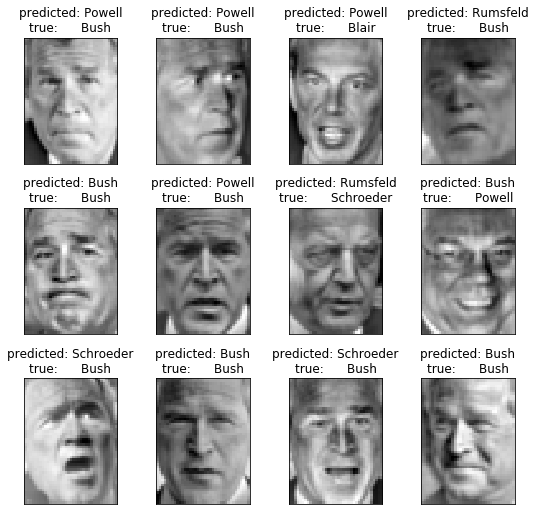

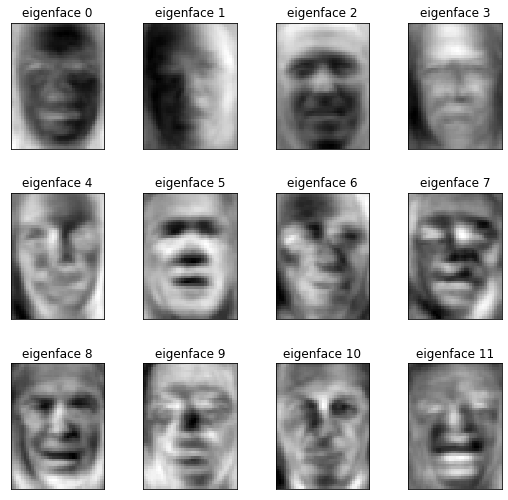

In [61]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, test_lbl, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(test_img, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces
eigenfaces = pca.components_.reshape((150, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()